In [15]:
# Import all dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import calendar

In [16]:
# Create Original Data Frame

df_ethnicity = pd.read_csv("case_demographics_ethnicity_updated.csv")
df_ethnicity

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date,month
0,Latino,5276,35.99,170,28.38,38.9,4/13/20,Apr
1,White,4639,31.64,246,41.07,36.6,4/13/20,Apr
2,Asian,1902,12.97,98,16.36,15.4,4/13/20,Apr
3,Black,1030,7.03,61,10.18,6.0,4/13/20,Apr
4,Multiracial,268,1.83,8,1.34,2.2,4/13/20,Apr
...,...,...,...,...,...,...,...,...
1755,Black,31789,4.20,1352,7.40,6.0,11/18/20,Nov
1756,Multi-Race,9290,1.20,156,0.90,2.2,11/18/20,Nov
1757,American Indian or Alaska Native,2227,0.30,63,0.30,0.5,11/18/20,Nov
1758,Native Hawaiian and other Pacific Islander,4069,0.50,88,0.50,0.3,11/18/20,Nov


In [30]:
# Group by based on ethnicity in order to aggregate data from csv file by ethnicity

df_eth_aggregated = df_ethnicity.groupby(["race_ethnicity"])
df_eth_aggregated.head()


,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date,month
0,Latino,5276,35.99,170,28.38,38.9,4/13/20,Apr
1,White,4639,31.64,246,41.07,36.6,4/13/20,Apr
2,Asian,1902,12.97,98,16.36,15.4,4/13/20,Apr
3,Black,1030,7.03,61,10.18,6.0,4/13/20,Apr
4,Multiracial,268,1.83,8,1.34,2.2,4/13/20,Apr
5,American Indian or Alaska Native,33,0.23,3,0.50,0.5,4/13/20,Apr
6,Native Hawaiian or Pacific Islander,243,1.66,4,0.67,0.3,4/13/20,Apr
7,Other,1269,8.66,9,1.50,0.0,4/13/20,Apr
8,Latino,5910,37.18,203,29.72,38.9,4/14/20,Apr
9,White,4939,31.07,264,38.65,36.6,4/14/20,Apr


In [17]:
# Query column structure of dataset.

df_ethnicity.columns

Index(['race_ethnicity', 'cases', 'case_percentage', 'deaths',
       'death_percentage', 'percent_ca_population', 'date', 'month'],
      dtype='object')

In [18]:
# Use value_counts function to help determine whether there are any months in the data that have incomplete data. The slight discrepancy between the months that ARE NOT April or November is because some months have 30 days vs. 31 days.

df_ethnicity["month"].value_counts()

Aug     248
Oct     248
Jul     248
May     248
Sept    240
Jun     240
Nov     144
Apr     144
Name: month, dtype: int64

In [19]:

df_month = df_ethnicity.groupby(["month"])

print(df_month)

df_month.count()

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date
month,,,,,,,
Apr,144,144,144,144,144,144,144
Aug,248,248,248,248,248,248,248
Jul,248,248,248,248,248,248,248
Jun,240,240,240,240,240,240,240
May,248,248,248,248,248,248,248
Nov,144,144,144,144,144,144,144
Oct,248,248,248,248,248,248,248
Sept,240,240,240,240,240,240,240


In [20]:
# Use .describe function to gather aggregate statistics in the Original Data Frame.

df_ethnicity.describe()

,cases,case_percentage,deaths,death_percentage,percent_ca_population
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,41335.618182,12.500596,1191.210795,12.500682,12.487500
std,82106.068516,17.832622,1949.518872,15.617099,15.348777
min,32.000000,0.185972,3.000000,0.220000,0.000000
25%,1898.000000,0.800000,45.750000,0.500000,0.450000
50%,8607.500000,5.450000,152.000000,4.995000,4.100000
75%,38014.750000,16.125000,1361.750000,20.355000,20.700000
max,455005.000000,61.200000,8900.000000,48.700000,38.900000


In [21]:
# Aggregate data by race and ethnicity. This was a failed initial attempt at trying to determine whether the race_ethnicity column in the original dataset required cleaning.

ethnicity_group = df_ethnicity.groupby(["race_ethnicity"])

df_race_aggregated = ethnicity_group.mean()
df_race_aggregated



,cases,case_percentage,deaths,death_percentage,percent_ca_population
race_ethnicity,,,,,
American Indian or Alaska Native,848.636364,0.230953,31.590909,0.341791,0.5
Asian,19173.040909,7.156979,1180.881818,13.367394,15.4
Black,14293.013636,4.762079,770.127273,8.782002,6.0
Latino,196653.936364,56.365234,4446.909091,43.629602,38.9
Multi-Race,4135.859649,0.912865,79.842105,0.660819,2.2
Multiracial,412.285714,1.074945,13.897959,0.632193,2.2
Native Hawaiian and other Pacific Islander,2310.748538,0.576608,54.122807,0.472515,0.3
Native Hawaiian or Pacific Islander,445.918367,1.126054,21.428571,0.962923,0.3
Other,36417.804545,10.667271,82.145455,1.061380,0.0


In [22]:
# Identify irregularities in the dataset as it pertains to race and ethnicity. There appear to be two "race_ethnicity" groups that require cleaning.

df_ethnicity["race_ethnicity"].value_counts()

White                                         220
Latino                                        220
Other                                         220
Asian                                         220
American Indian or Alaska Native              220
Black                                         220
Native Hawaiian and other Pacific Islander    171
Multi-Race                                    171
Multiracial                                    49
Native Hawaiian or Pacific Islander            49
Name: race_ethnicity, dtype: int64

In [23]:
# Clean up the data!

df_ethnicity["race_ethnicity"] = df_ethnicity["race_ethnicity"].replace({'Multiracial': 'Multi-Race', 'Native Hawaiian or Pacific Islander': 'Native Hawaiian and other Pacific Islander'})

# ... And verify the cleanup.
df_ethnicity["race_ethnicity"].value_counts()

Native Hawaiian and other Pacific Islander    220
White                                         220
Latino                                        220
Other                                         220
Asian                                         220
American Indian or Alaska Native              220
Multi-Race                                    220
Black                                         220
Name: race_ethnicity, dtype: int64

In [25]:
# Create a new Data Frame that parses the original dataset to only inlclude 'month markers' (the last day of the month for each month captured in the dataset. Since the data is as recent as November 18, the month of November's 'month marker' will be 11/18/20)

df_month_markers = df_ethnicity.loc[(df_ethnicity["date"] == "4/30/20") | (df_ethnicity["date"] == "5/31/20") | (df_ethnicity["date"] == "6/30/20") | (df_ethnicity["date"] == "7/31/20") | (df_ethnicity["date"] == "8/31/20") | (df_ethnicity["date"] == "9/30/20") | (df_ethnicity["date"] == "10/31/20") | (df_ethnicity["date"] == "11/18/20")]
df_month_markers

,race_ethnicity,cases,case_percentage,deaths,death_percentage,percent_ca_population,date,month
136,Latino,15233,46.0,657,34.6,38.9,4/30/20,Apr
137,White,8926,27.0,655,34.5,36.6,4/30/20,Apr
138,Asian,3988,12.0,324,17.0,15.4,4/30/20,Apr
139,Black,2131,6.4,201,10.6,6.0,4/30/20,Apr
140,Multi-Race,282,0.9,7,0.4,2.2,4/30/20,Apr
...,...,...,...,...,...,...,...,...
1755,Black,31789,4.2,1352,7.4,6.0,11/18/20,Nov
1756,Multi-Race,9290,1.2,156,0.9,2.2,11/18/20,Nov
1757,American Indian or Alaska Native,2227,0.3,63,0.3,0.5,11/18/20,Nov
1758,Native Hawaiian and other Pacific Islander,4069,0.5,88,0.5,0.3,11/18/20,Nov


In [26]:
# Use the pivot function to create a new Data Frame displaying case numbers by race and ethnicity. Then, reorganize the columns to display the dates chronologically.

df_cases_pvt = df_month_markers.pivot(index='race_ethnicity', columns='date', values='cases')
df_cases_pvt_organized = df_cases_pvt[["4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/18/20"]]
df_cases_pvt_organized

date,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/18/20
race_ethnicity,,,,,,,,
American Indian or Alaska Native,66,167,298,754,1162,1525,1879,2227
Asian,3988,7237,10208,17534,25585,31419,36626,42840
Black,2131,4172,6774,13795,20098,24242,27719,31789
Latino,15233,43392,86009,185186,282690,347065,401503,455005
Multi-Race,282,618,1069,2563,4340,6024,7562,9290
Native Hawaiian and other Pacific Islander,400,617,952,1895,2643,3079,3514,4069
Other,2089,7689,23472,45265,55381,57167,63328,74457
White,8926,15954,26127,55755,79526,97491,116385,140379


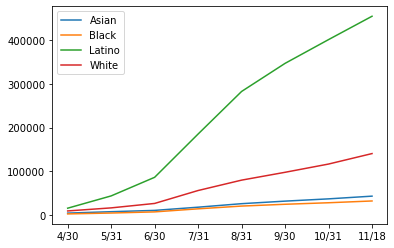

In [27]:
# Using the data aggregated above, create a line chart showing case trend data, focusing on the four ethnicity groups that make up the overwhelming share of coronavirus cases in California.

cases_plot_df = pd.DataFrame({
    'Asian': [3988, 7237, 10208, 17534, 25585, 31419, 36626, 42840],
    'Black': [2131,	4172, 6774, 13795, 20098, 24242, 27719, 31789],
    'Latino': [15233, 43392, 86009, 185186,	282690, 347065,	401503, 455005],
    'White': [8926,	15954, 26127, 55755, 79526, 97491, 116385, 140379]
    }, index=['4/30', '5/31', '6/30', '7/31', '8/31', '9/30', '10/31', '11/18'])

lines = cases_plot_df.plot.line()

In [28]:
# Use the pivot function to create a new Data Frame displaying percentage of total cases by race and ethnicity. Then, reorganize the columns to display the dates chronologically.

df_casepercentage_pivot = df_month_markers.pivot(index='race_ethnicity', columns='date', values='case_percentage')
df_casepercentage_pivot_organized = df_casepercentage_pivot[["4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/18/20"]]
df_casepercentage_pivot_organized

date,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/18/20
race_ethnicity,,,,,,,,
American Indian or Alaska Native,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3
Asian,12.0,9.1,6.6,5.4,5.4,5.5,5.6,5.6
Black,6.4,5.2,4.4,4.3,4.3,4.3,4.2,4.2
Latino,46.0,54.3,55.5,57.4,60.0,61.1,61.0,59.9
Multi-Race,0.9,0.8,0.7,0.8,0.9,1.1,1.1,1.2
Native Hawaiian and other Pacific Islander,1.2,0.8,0.6,0.6,0.6,0.5,0.5,0.5
Other,6.3,9.6,15.2,14.0,11.7,10.1,9.6,9.8
White,27.0,20.0,16.9,17.3,16.9,17.2,17.7,18.5


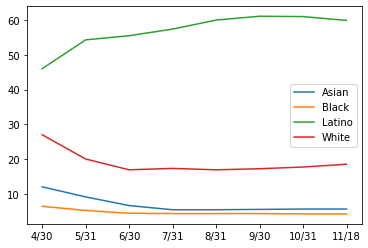

In [29]:
# Using the data aggregated above, create a line chart showing trend data on percentage of cases by ethnicity.

casepercentage_plot_df = pd.DataFrame({
    'Asian': [12.0,	9.1, 6.6, 5.4, 5.4,	5.5, 5.6, 5.6],
    'Black': [6.4, 5.2,	4.4, 4.3, 4.3, 4.3,	4.2, 4.2],
    'Latino': [46.0, 54.3, 55.5, 57.4, 60.0, 61.1, 61.0, 59.9],
    'White': [27.0,	20.0, 16.9, 17.3, 16.9, 17.2, 17.7, 18.5]
    }, index=['4/30', '5/31', '6/30', '7/31', '8/31', '9/30', '10/31', '11/18'])

lines = casepercentage_plot_df.plot.line()


In [30]:
# Use the pivot function to create a new Data Frame displaying total deaths by race and ethnicity. Then, reorganize the columns to display the dates chronologically.

df_deaths_pivot = df_month_markers.pivot(index='race_ethnicity', columns='date', values='deaths')
df_deaths_pivot_organized = df_deaths_pivot[["4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/18/20"]]
df_deaths_pivot_organized

date,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/18/20
race_ethnicity,,,,,,,,
American Indian or Alaska Native,7,14,22,33,41,49,58,63
Asian,324,595,855,1124,1488,1832,2060,2146
Black,201,399,556,745,979,1192,1308,1352
Latino,657,1563,2456,4115,6110,7549,8506,8900
Multi-Race,7,26,27,50,77,106,142,156
Native Hawaiian and other Pacific Islander,18,29,23,48,55,73,82,88
Other,32,33,64,121,145,128,74,88
White,655,1344,1902,2667,3716,4681,5269,5552


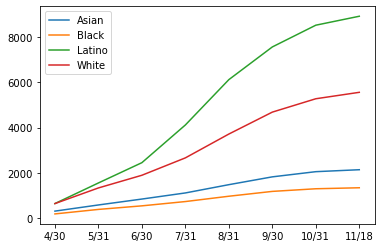

In [31]:
# Using the data aggregated above, create a line chart showing trend data on Covid-19-related deaths in California by ethnicity, focusing on the four ethnicity groups that make up the overwhelming share of coronavirus-related deaths in California.

deaths_plot_df = pd.DataFrame({
    'Asian': [324, 595, 855, 1124, 1488, 1832, 2060, 2146],
    'Black': [201, 399, 556, 745, 979, 1192, 1308, 1352],
    'Latino': [657, 1563, 2456, 4115, 6110,	7549, 8506,	8900],
    'White': [655, 1344, 1902, 2667, 3716, 4681, 5269, 5552]
    }, index=['4/30', '5/31', '6/30', '7/31', '8/31', '9/30', '10/31', '11/18'])

lines = deaths_plot_df.plot.line()

In [32]:
# Use the pivot function to create a new Data Frame displaying the percentage of total deaths in California by race and ethnicity. Then, reorganize the columns to display the dates chronologically.

df_deathpercentage_pivot = df_month_markers.pivot(index='race_ethnicity', columns='date', values='death_percentage')
df_deathpercentage_pivot_organized = df_deathpercentage_pivot[["4/30/20", "5/31/20", "6/30/20", "7/31/20", "8/31/20", "9/30/20", "10/31/20", "11/18/20"]]
df_deathpercentage_pivot_organized

date,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/18/20
race_ethnicity,,,,,,,,
American Indian or Alaska Native,0.4,0.3,0.4,0.4,0.3,0.3,0.3,0.3
Asian,17.0,14.9,14.5,12.6,11.8,11.7,11.8,11.7
Black,10.6,10.0,9.4,8.4,7.8,7.6,7.5,7.4
Latino,34.6,39.0,41.6,46.2,48.4,48.4,48.6,48.5
Multi-Race,0.4,0.6,0.5,0.6,0.6,0.7,0.8,0.9
Native Hawaiian and other Pacific Islander,0.9,0.7,0.4,0.5,0.4,0.5,0.5,0.5
Other,1.7,0.8,1.1,1.4,1.1,0.8,0.4,0.5
White,34.5,33.6,32.2,30.0,29.5,30.0,30.1,30.3


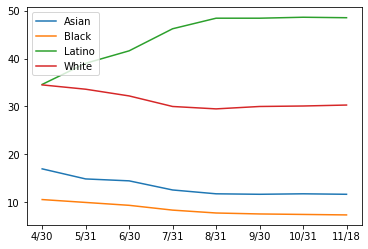

In [33]:
# Using the data aggregated above, create a line chart showing trend data on percentage of deaths in California by ethnicity.

deathpercentage_plot_df = pd.DataFrame({
    'Asian': [17.0,	14.9, 14.5, 12.6, 11.8, 11.7, 11.8, 11.7],
    'Black': [10.6,	10.0, 9.4, 8.4,	7.8, 7.6, 7.5, 7.4],
    'Latino': [34.6, 39.0, 41.6, 46.2, 48.4, 48.4, 48.6, 48.5],
    'White': [34.5,	33.6, 32.2, 30.0, 29.5, 30.0, 30.1, 30.3]
    }, index=['4/30', '5/31', '6/30', '7/31', '8/31', '9/30', '10/31', '11/18'])

lines = deathpercentage_plot_df.plot.line()

In [34]:
# Create a Data Frame from df_ethnicity (Original Data Frame) containing only race/ethnicity and percentage of California population for merging.

df_ethnicity_proportion = df_ethnicity[["race_ethnicity", "percent_ca_population"]]
df_ethnicity_proportion

,race_ethnicity,percent_ca_population
0,Latino,38.9
1,White,36.6
2,Asian,15.4
3,Black,6.0
4,Multi-Race,2.2
...,...,...
1755,Black,6.0
1756,Multi-Race,2.2
1757,American Indian or Alaska Native,0.5
1758,Native Hawaiian and other Pacific Islander,0.3


In [35]:
# Remove all duplicates in new Data Frame (original data frame has 1760 rows).

df_proportion_formerge = df_ethnicity_proportion.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df_proportion_formerge

,race_ethnicity,percent_ca_population
0,Latino,38.9
1,White,36.6
2,Asian,15.4
3,Black,6.0
4,Multi-Race,2.2
5,American Indian or Alaska Native,0.5
6,Native Hawaiian and other Pacific Islander,0.3
7,Other,0.0


In [36]:
# Create a new Data Frame that merges information from df_proportion_formerge (above) with the following Data Frame: df_casepercentage_pivot_organized

df_merged_casepercentage = pd.merge(df_casepercentage_pivot_organized, df_proportion_formerge, on='race_ethnicity', how='left')
df_merged_casepercentage

,race_ethnicity,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/18/20,percent_ca_population
0,American Indian or Alaska Native,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3,0.5
1,Asian,12.0,9.1,6.6,5.4,5.4,5.5,5.6,5.6,15.4
2,Black,6.4,5.2,4.4,4.3,4.3,4.3,4.2,4.2,6.0
3,Latino,46.0,54.3,55.5,57.4,60.0,61.1,61.0,59.9,38.9
4,Multi-Race,0.9,0.8,0.7,0.8,0.9,1.1,1.1,1.2,2.2
5,Native Hawaiian and other Pacific Islander,1.2,0.8,0.6,0.6,0.6,0.5,0.5,0.5,0.3
6,Other,6.3,9.6,15.2,14.0,11.7,10.1,9.6,9.8,0.0
7,White,27.0,20.0,16.9,17.3,16.9,17.2,17.7,18.5,36.6


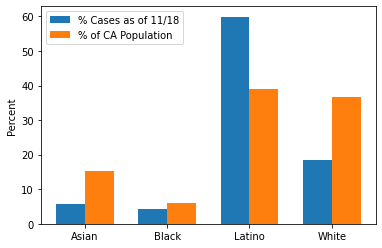

In [37]:
# Using the data from the above Data Frame, create a double bar chart showing comparing each ethnic group's most recent percentage of Covid-19 cases with the percentage of California population.

N = 4

latest_case_percentage = (5.6, 4.2, 59.9, 18.5)
percent_california_population = (15.4, 6.0, 38.9, 36.6)

ind = np.arange(N)
width = 0.35
plt.bar(ind, latest_case_percentage, width, label='% Cases as of 11/18')
plt.bar(ind + width, percent_california_population, width, label='% of CA Population')

plt.ylabel('Percent')

plt.xticks(ind + width / 2, ('Asian', 'Black', 'Latino', 'White'))
plt.legend(loc='best')
plt.show()


In [39]:
# Create a new Data Frame that merges information from df_proportion_formerge with df_deathpercentage_pivot_organized

df_merged_deathpercentage = pd.merge(df_deathpercentage_pivot_organized, df_proportion_formerge, on="race_ethnicity", how="left")
df_merged_deathpercentage

,race_ethnicity,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/18/20,percent_ca_population
0,American Indian or Alaska Native,0.4,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.5
1,Asian,17.0,14.9,14.5,12.6,11.8,11.7,11.8,11.7,15.4
2,Black,10.6,10.0,9.4,8.4,7.8,7.6,7.5,7.4,6.0
3,Latino,34.6,39.0,41.6,46.2,48.4,48.4,48.6,48.5,38.9
4,Multi-Race,0.4,0.6,0.5,0.6,0.6,0.7,0.8,0.9,2.2
5,Native Hawaiian and other Pacific Islander,0.9,0.7,0.4,0.5,0.4,0.5,0.5,0.5,0.3
6,Other,1.7,0.8,1.1,1.4,1.1,0.8,0.4,0.5,0.0
7,White,34.5,33.6,32.2,30.0,29.5,30.0,30.1,30.3,36.6


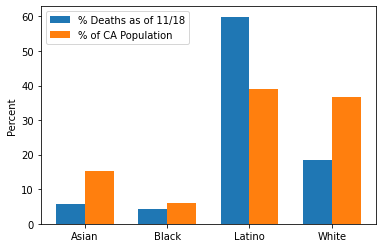

In [40]:
# Using the data from the above Data Frame, create a double bar chart showing comparing each ethnic group's most recent percentage of Covid-19 deaths with the percentage of California population.

N = 4

latest_death_percentage = (11.7, 7.4, 48.5, 30.3)
percent_california_population = (15.4, 6.0, 38.9, 36.6)

ind = np.arange(N)
width = 0.35
plt.bar(ind, latest_case_percentage, width, label='% Deaths as of 11/18')
plt.bar(ind + width, percent_california_population, width, label='% of CA Population')

plt.ylabel('Percent')
plt.xticks(ind + width / 2, ('Asian', 'Black', 'Latino', 'White'))
plt.legend(loc='best')
plt.show()